In [1]:
from datasets import load_dataset
from dotenv import load_dotenv

load_dotenv()
xlsum = load_dataset('anakib1/mango-truth', 'xlsum')['train']

In [8]:
from detectors.detect_gpt.detector import DetectGpt

model = DetectGpt('google/mt5-large', 'openai-community/gpt2', num_perturbations=25)

(array([62.,  5., 10., 15.,  3.,  1.,  0.,  1.,  2.,  1.]),
 array([  223. ,  2854.7,  5486.4,  8118.1, 10749.8, 13381.5, 16013.2,
        18644.9, 21276.6, 23908.3, 26540. ]),
 <BarContainer object of 10 artists>)

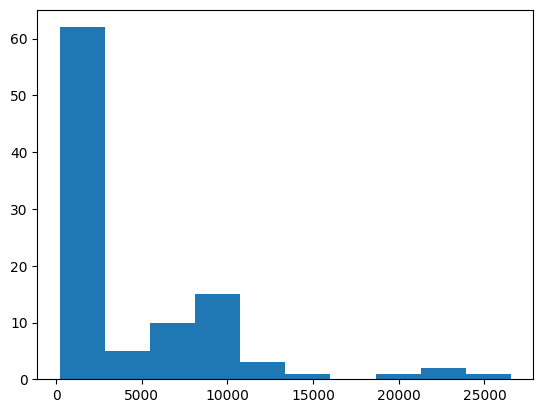

In [9]:
from matplotlib import pyplot as plt

plt.hist(xlsum.filter(lambda x: x['label'] == 0).map(lambda x: {'ln' : len(x['output'])}).take(100)['ln'])

In [15]:
count = 10
human = xlsum.filter(lambda x: x['label'] == 0 and len(x['output']) < 5000).take(count)['output']
ai = xlsum.filter(lambda x: x['label'] == 3 and len(x['output']) < 5000).select(range(0, count * 5, 5))['output']
X = human + ai
y = [0] * len(human) + [1] * len(ai)

Filter:   0%|          | 0/47356 [00:00<?, ? examples/s]

Filter:   0%|          | 0/47356 [00:00<?, ? examples/s]

In [16]:
from tqdm.auto import tqdm
perplexities = [model.return_difference(x) for x in tqdm(X)]

  0%|          | 0/20 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying perturbations:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

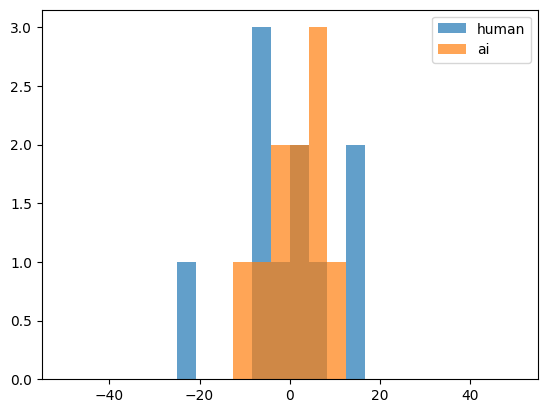

In [19]:
from matplotlib import pyplot as plt 

import numpy as np
bins = np.linspace(-50, 50, 25)

human = perplexities[:count]
ai = perplexities[count:]

plt.hist(human, bins=bins, alpha=.7,label='human')
plt.hist(ai, bins=bins, alpha=.7, label='ai')
plt.legend()

In [8]:
import numpy as np
a = np.array(probs)

In [17]:
from detectors.utils.training import calculate_classification

SplitConclusion(metrics=ClassificationMetrics(tpr_at_1_percent_fpr=np.float64(0.02333333333333333), tpr_at_10_percent_fpr=np.float64(0.2333333333333333), auc=np.float64(0.7), f1=np.float64(0.7), accuracy=0.7, precision=np.float64(0.7), recall=np.float64(0.7)), representations=ClassificationRepresentations(roc_curve=<Figure size 640x480 with 1 Axes>, clf_report=<Figure size 640x480 with 2 Axes>))

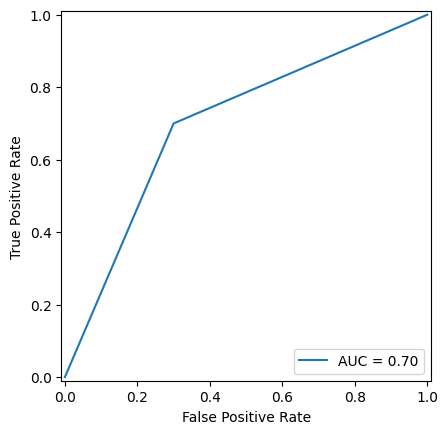

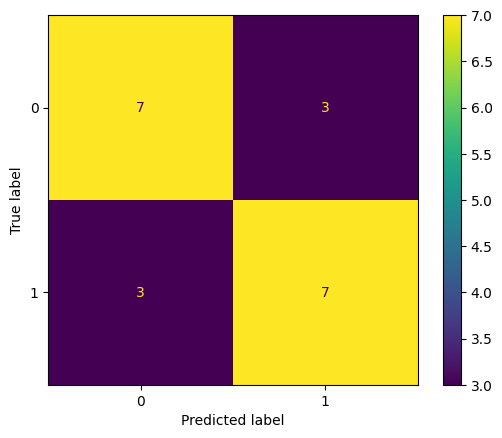

In [19]:
calculate_classification(y, a[:, 0])